In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Plot

In [2]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## Customizing the plot:

In [3]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [4]:
# Choosing first color from 'rocket' pallete
color = sns.color_palette("rocket")[0]

In [5]:
sns.set_theme(style="whitegrid", context="notebook", palette="rocket")

## Create Vetical bar chart for generation id counts

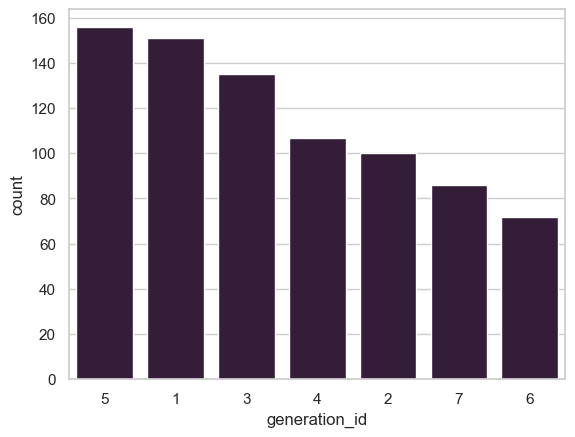

In [6]:
freq = pokemon["generation_id"].value_counts() # Already in descending order
order = freq.index
sns.countplot(data=pokemon, x="generation_id", color=color, order=order);

## Plot Bar Chart for relative frequency of pokemon type

### Data wrangling

Un-pivoting the columns in order to have values of variables: type_1 and type_2 on same column rather than same row. 

This way we only need to find counts of type in a single column

In [7]:
pokemon = pd.read_csv("pokemon.csv")

In [8]:
pokemon.shape

(807, 14)

In [9]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [10]:
pokemon["species"].describe() # Seems like no duplicated species as unique == count and no NaN as count == rows

count           807
unique          807
top       bulbasaur
freq              1
Name: species, dtype: object

In [11]:
pkmn_types = pokemon.melt(id_vars=["id", "species"],
                          value_vars=["type_1", "type_2"], 
                          var_name="type_level",
                          value_name="type")

# One Column for label of variables and one column for values corrsponding to these labels is used 
# along with identifier variables (id_var) columns
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


### Plotting counts

In [12]:
type_counts = pkmn_types["type"].value_counts() # keep in mind that NaN values are not included in calculations
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

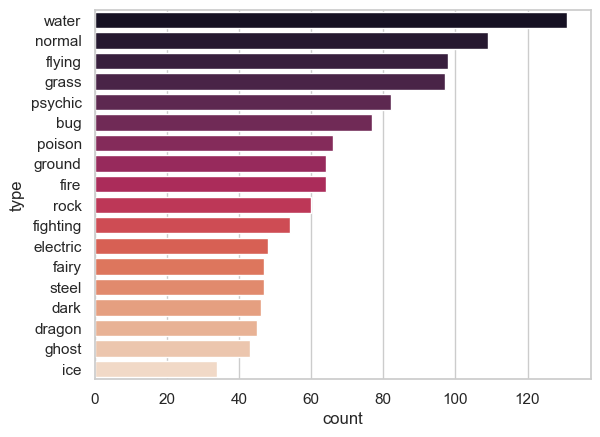

In [13]:
type_order = type_counts.index
sns.countplot(data=pkmn_types, y="type", palette="rocket", order=type_order);

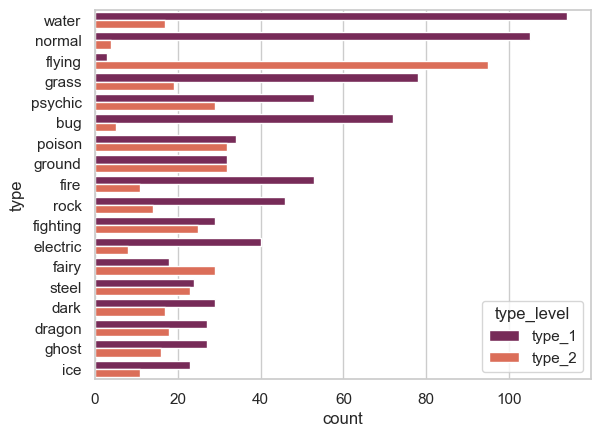

In [14]:
sns.countplot(data=pkmn_types, y="type", palette="rocket", order=type_order, hue="type_level");

### Plotting Proportions

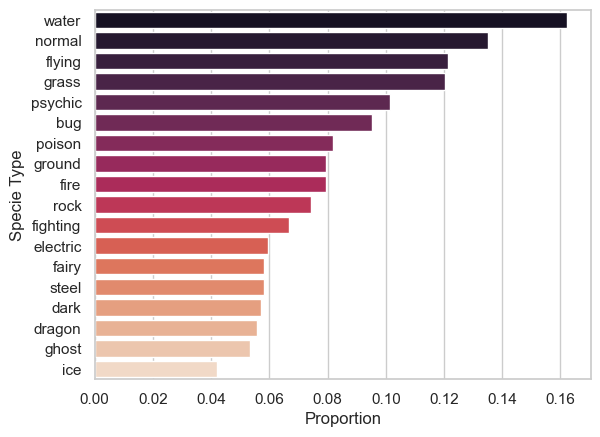

In [15]:
type_counts = pkmn_types["type"].value_counts()
type_order = type_counts.index

sns.countplot(data=pkmn_types, y="type", palette="rocket", order=type_order)

# Finding xtick positions and labels
max_count = type_counts[0]
n_pokemons = pkmn_types["species"].unique().shape[0]
max_prop = max_count / n_pokemons
tick_props = np.arange(0, max_prop, 0.02)

tick_labels = ["{:.02f}".format(i) for i in tick_props]
tick_positions = tick_props * n_pokemons

plt.xticks(ticks=tick_positions, labels=tick_labels)  
# The plot is still plotted on counts. The xticks do not change the plot rather it just places the tick_labels at tick_positions which are counts for rescpective tick label

plt.xlabel("Proportion")
plt.ylabel("Specie Type");

### Plot Counts with Propotions on plot

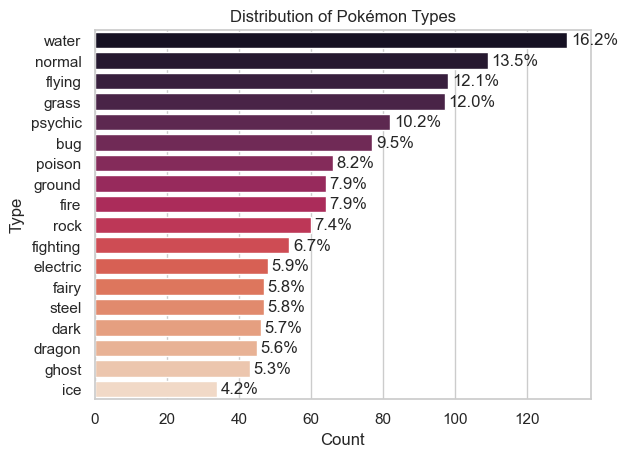

In [16]:
type_counts = pkmn_types["type"].value_counts(normalize=False)
type_order = type_counts.index
n_pokemons = pkmn_types["species"].unique().shape[0]
total_types = type_counts.shape[0]

sns.countplot(data=pkmn_types, y="type", palette="rocket", order=type_order)

for i in range(total_types): 
    count = type_counts[i]
    pct_label = "{:.1f}%".format(100*count/n_pokemons)
    plt.text(x=count + 1, y=i, s=pct_label,va="center")

# The x postion will be the counts, and the y position (for these catgorical labels) is 0,1,2,...
# For example the postion of end of 'normal' bar is (x=counts of 'normal', y=1)

plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Distribution of Pokémon Types");

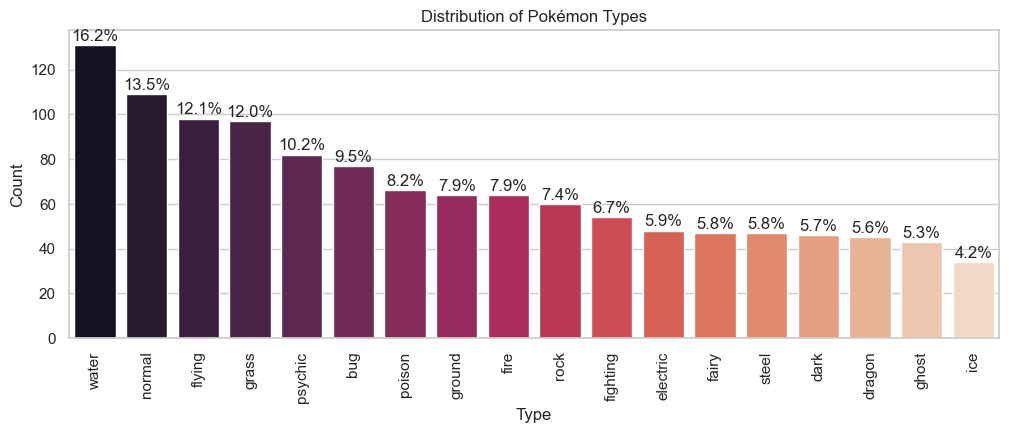

In [17]:
# Lets try alternative way using location and labels of existing xticks
plt.figure(figsize=(12,4))
sns.countplot(data=pkmn_types, x='type', palette="rocket", order=type_order)
locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_label = "{:.1f}%".format(100*count/n_pokemons)
    plt.text(x=loc, y=count+2, s=pct_label, ha="center")

plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Distribution of Pokémon Types");

## A simple Donut plot

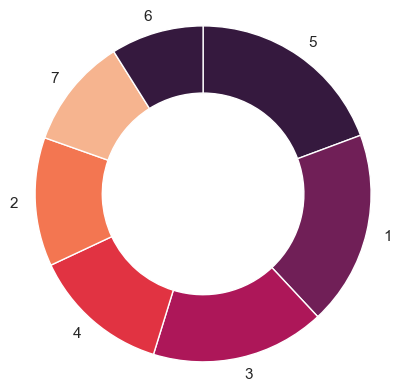

In [18]:
type_counts = pokemon["generation_id"].value_counts()
plt.pie(type_counts, labels=type_counts.index, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.axis("square"); 

## Plot histogram for speed

### Selecting New Theme

In [19]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [20]:
sns.set_theme(style="white", context="paper", palette="mako")

### Plotting

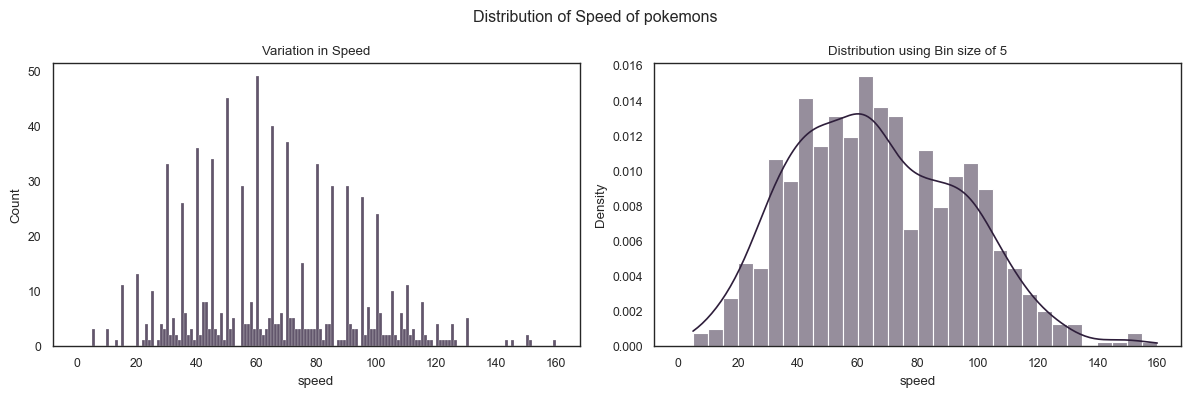

In [21]:
bin1_edges = np.arange(0, pokemon["speed"].max() + 5, 5)
bin2_edges = np.arange(0, pokemon["speed"].max() + 1, 1)

fig, axs = plt.subplots(1,2, figsize=(12, 4))
sns.histplot(data=pokemon, x="speed", stat="count", bins=bin2_edges, ax=axs[0])
sns.histplot(data=pokemon, x="speed", kde=True, stat="density", bins=bin1_edges, ax=axs[1])


axs[0].set_title("Variation in Speed")
axs[1].set_title("Distribution using Bin size of 5")
fig.suptitle('Distribution of Speed of pokemons')
plt.tight_layout()

## Discrete Plot

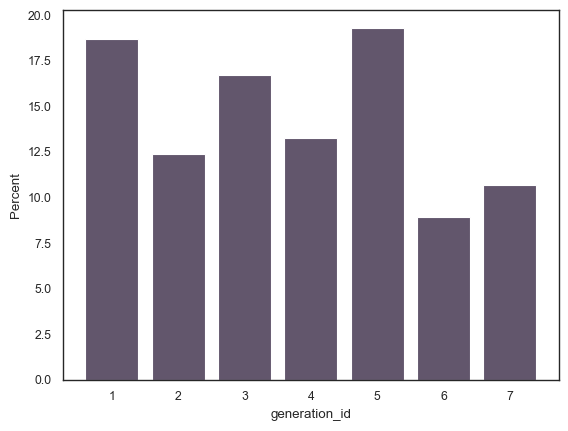

In [22]:
sns.histplot(data=pokemon, x="generation_id", discrete=True, stat="percent", shrink=0.8); 

## Outliers and Axis Limits

In [23]:
sns.set_theme(context="notebook", style="darkgrid", palette="mako")

In [24]:
color = sns.color_palette("mako")[1]

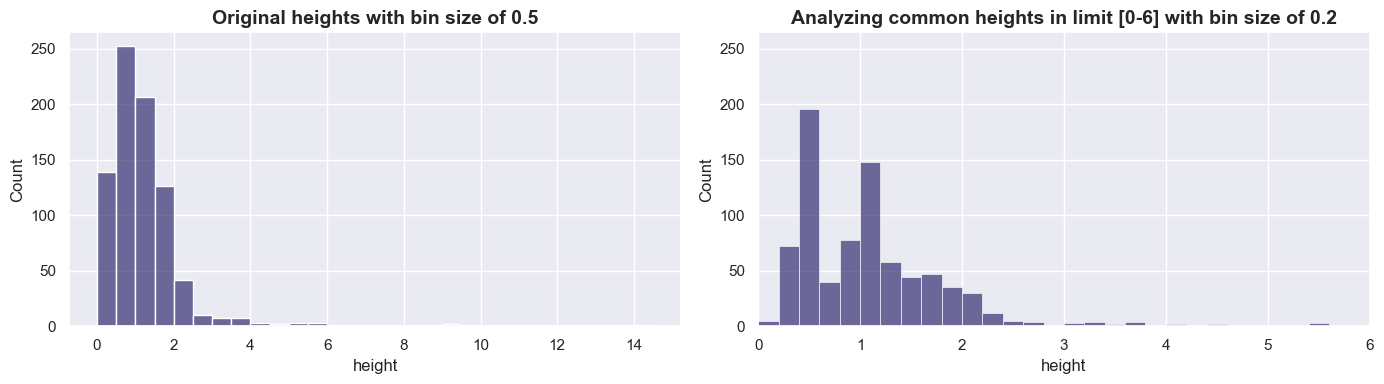

In [25]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
sns.histplot(data=pokemon, x="height", color=color, bins=bins)
plt.title("Original heights with bin size of 0.5", fontdict=dict(weight="bold", fontsize=14))

ax2 = plt.subplot(1,2,2, sharey=ax1)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.title("Analyzing common heights in limit [0-6] with bin size of 0.2", fontdict=dict(weight="bold", fontsize=14))
sns.histplot(data=pokemon, x="height", color=color, bins=bins)
plt.xlim((0,6))

plt.tight_layout()

**We had outliers in out data. Rather than filtering the data, we can zoom into data by decreasing the axis limits and bin size.**

## Scale Transformation

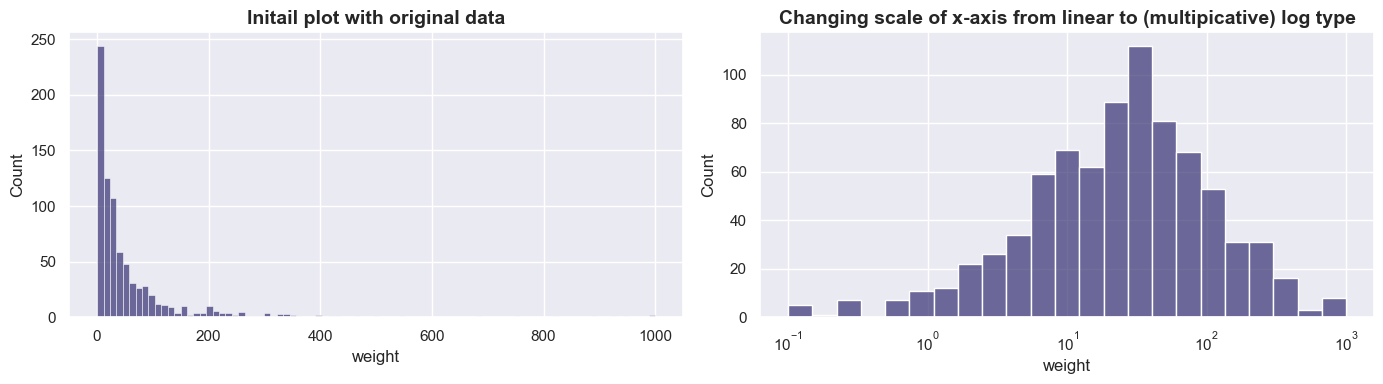

In [26]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot(1,2,1)
sns.histplot(data=pokemon, x="weight", color=color)
plt.title("Initail plot with original data", fontdict=dict(weight="bold", fontsize=14))

ax2 = plt.subplot(1,2,2)
sns.histplot(data=pokemon, x="weight", color=color, log_scale=True)
plt.title("Changing scale of x-axis from linear to (multipicative) log type", fontdict=dict(weight="bold", fontsize=14))

plt.tight_layout(); 

**Features of log scale:**
- It is multipicative scale. For example if log10 scale is used, then increase in x in this scale corresponds to increase in $10^x$ *times* of actual value
- It compresses the linear scale, dealing with wide range of values
- It is applied on positive (greater than 0) values because log inverse is always positive
- It changes the log-normal distribution, which is highly skewed on linear scale, to normal distribution

### Imporving the log plot:

In [27]:
# Finding the min and max log scale values
np.log10(pokemon["weight"].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Finding the bins:

In [28]:
bins = np.arange(-1, 3+0.1, 0.1)

**Note:** The bin of width 0.1 on log scale corresponds to bin with $10^{0.1} = 1.25$ *times (or 25%) increase* in actual value on linear scale

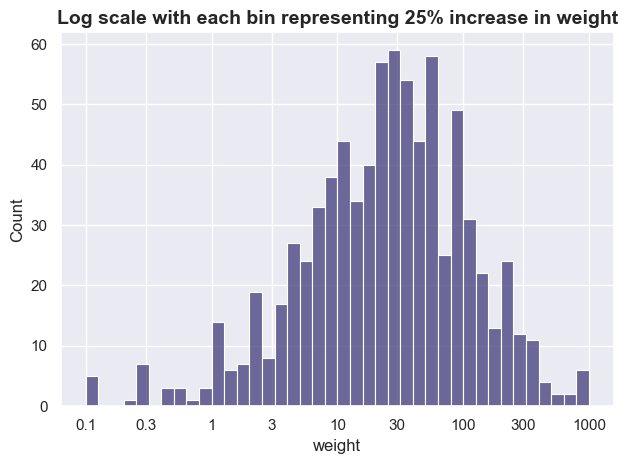

In [29]:
sns.histplot(data=pokemon, x="weight", color=color, log_scale=True, bins=bins) 
# Alternative to log_scale. Use plt.xscale("log") BEFORE creating hist plot

ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000] 
# The midpoint of value and its x times increase on multipicative log scale is sqrt(x). That why sqrt(10) = 3 is multiplied
tick_labels = ["{}".format(v) for v in ticks]
plt.xticks(ticks=ticks, labels=tick_labels)

plt.title("Log scale with each bin representing 25% increase in weight", fontdict=dict(weight="bold", fontsize=14))
plt.tight_layout()

### Custom feature scaling

For transformations that are not available in xscale, we can use the custom scaling function. Lets say we want square root transformation 
(for data which seems to be squared) :

In [30]:
def sqrt_trans(x, inverse=False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

In [31]:
scaled_max = sqrt_trans(pokemon["weight"].max())
scaled_max

31.62119542332326

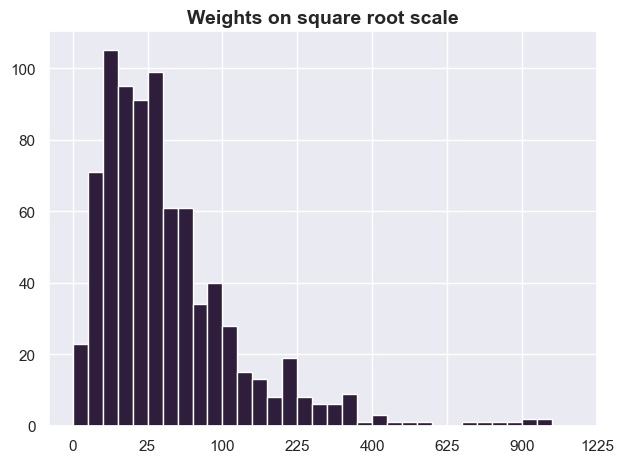

In [32]:
bin_edges = np.arange(0, sqrt_trans(pokemon["weight"].max()) + 1, 1)
plt.hist(pokemon["weight"].apply(sqrt_trans), bins=bin_edges)

tick_locs = np.arange(0, 36, 5)
tick_labels = [sqrt_trans(v, inverse=True) for v in tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels)

plt.title("Weights on square root scale", fontdict=dict(weight="bold", fontsize=14))
plt.tight_layout()

# Bivariate Plot

In [33]:
fuel_econ = pd.read_csv("fuel-econ.csv")
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [34]:
fuel_econ.info() # Seems like already cleaned data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

## Scatter Plot (Quant/Quant) and Correlation

In [35]:
sns.set_theme(style="darkgrid", context="notebook", palette="rocket")

**Q: What is the effect of displacement volume of engine on the fuel efficiency?**

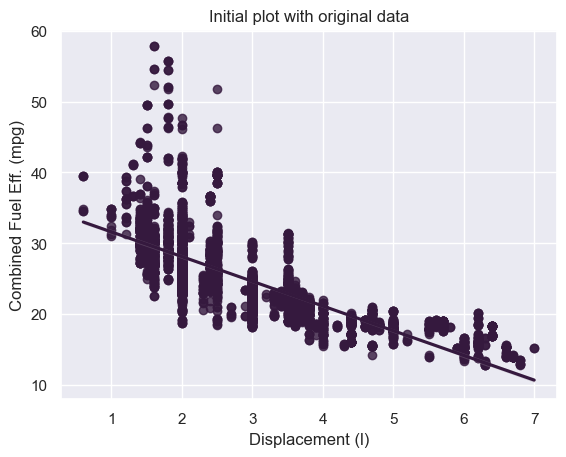

In [36]:
sns.regplot(data=fuel_econ, x="displ", y="comb")
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)'); 
plt.title("Initial plot with original data"); 

The y values seems to rise exponentially when displacement volume of engine is small. Lets compress the wide range of y axis using log transform

In [37]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

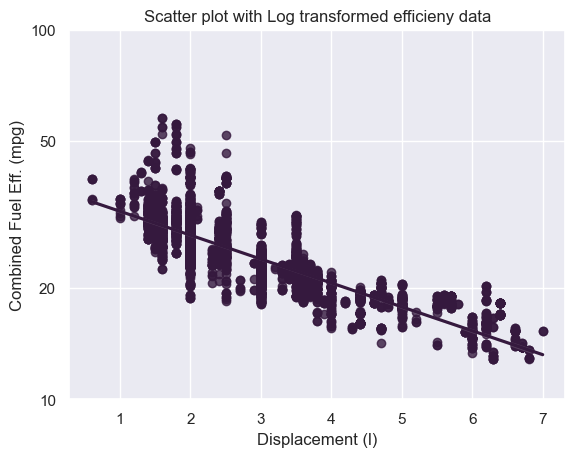

In [38]:
sns.regplot(x=fuel_econ["displ"], y=fuel_econ["comb"].apply(log_trans))

tick_labels = [10, 20, 50, 100]
tick_locs = log_trans(tick_labels)
plt.yticks(tick_locs, tick_labels)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)'); 
plt.title("Scatter plot with Log transformed efficieny data"); 

**Ans: The displacement volume has a negative linear relationship with *Log10* of fuel efficieny.** 

## Overplotting, Transparency, and Jitter

**Q: How the fuel efficiency affected with years?**

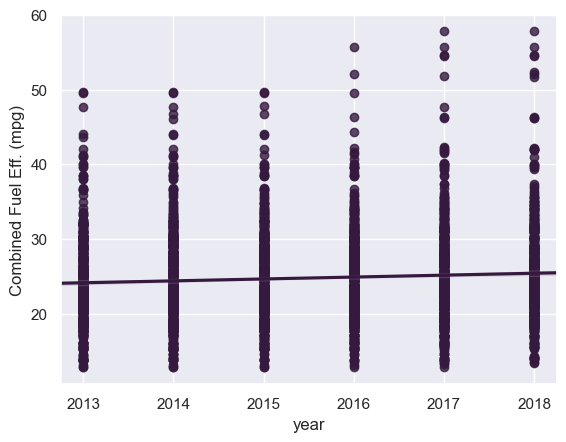

In [39]:
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False)
plt.ylabel('Combined Fuel Eff. (mpg)'); 

- This is overplotting which results from e.g. very high sample sizes, or when one of the variables (say on x-axis) is discrete. The year variable is descrete.
- We will use **Jittering** which is adding a bit of random noise to scatterplots, to better see the information contained in the data, usually when there is a lot of overplotting.


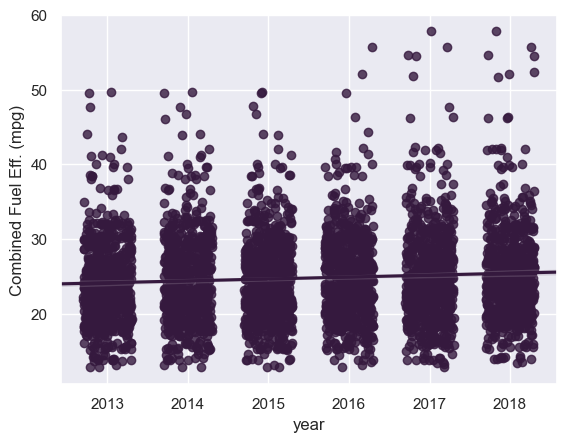

In [40]:
# The x_jitter will make x value of each point to be adjusted randomly by +/-0.3
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False, x_jitter=0.3)
plt.ylabel('Combined Fuel Eff. (mpg)'); 

- Using jitter, the degree of variability and strength of relationship is a bit more clear. You can easily see where is the more concentation of points 
- It can be further improved by adding **Transparency** to data points

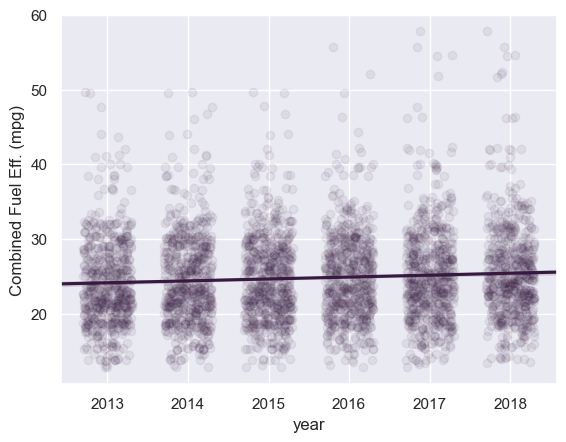

In [41]:
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False, x_jitter=0.3, scatter_kws={"alpha":1/15})
plt.ylabel('Combined Fuel Eff. (mpg)'); 

The high concentration of points is more distinguishable now.

Lets compare three of them:

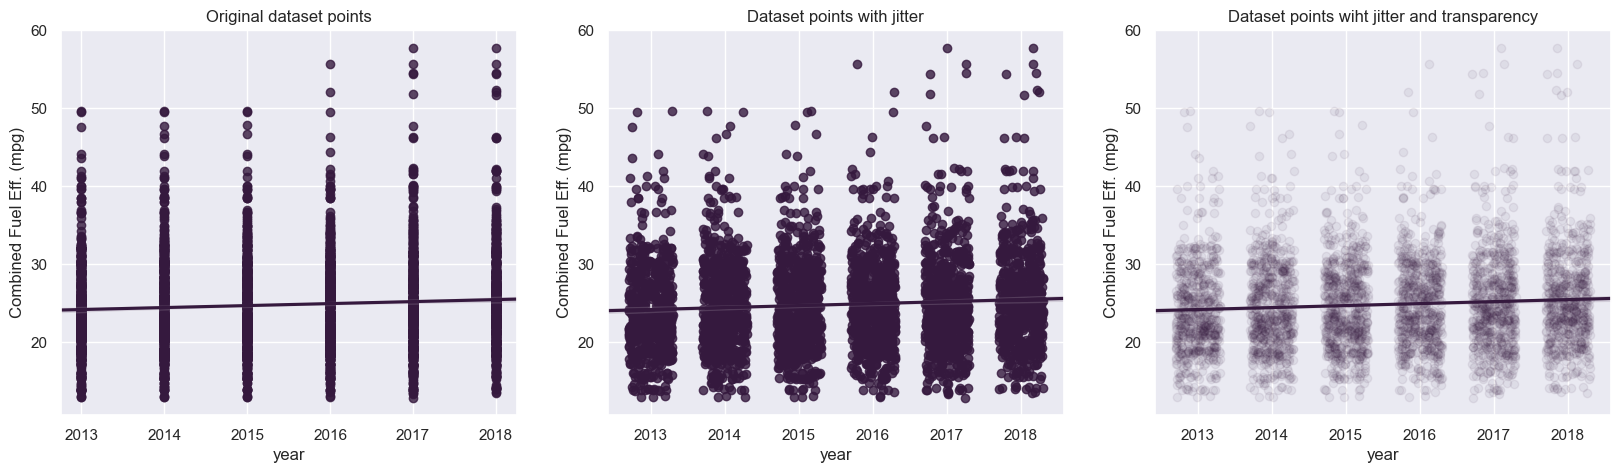

In [42]:
plt.figure(figsize=(20,5))

plt.subplot(1,3, 1)
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False)
plt.title("Original dataset points")
plt.ylabel('Combined Fuel Eff. (mpg)'); 

plt.subplot(1,3, 2)
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False, x_jitter=0.3)
plt.title("Dataset points with jitter")
plt.ylabel('Combined Fuel Eff. (mpg)'); 

plt.subplot(1,3, 3)
sns.regplot(data=fuel_econ, x="year", y="comb", truncate=False, x_jitter=0.3, scatter_kws={"alpha":1/15})
plt.title("Dataset points wiht jitter and transparency")
plt.ylabel('Combined Fuel Eff. (mpg)'); 

**Comparison:**
- Original plot indicated that high concentration of points is between 10 and 40 fuel efficiency
- Jitter dispersed the points and indicated that high concentration lies between 15 and 35 fuel efficiency
- Transparency made the concentration more distinguishable and indicated that high concentration lies between 20 and 30 fuel efficiency

## Heat Map (Quant/Quant)

Heat map is favored over scatter plot in following cases:
- To represent a plot for discrete vs another discrete variable because we cannot use jitter along both axis as it will be imprecise
- As an alternative to transparency when data points are enormous

Heat map is a 2-D version of histogram where plotting area is divided into grid and number of points in each grid cell is added up. The counts are idicated by color of grid cell.

Bin size or gird cell size is important because with very large size, you fail to see the major trends in data and very small bin size will increase the noise

**Q: In earlier plot between fuel efficiency and displacement, we were able to find the trend using scatter plot but we could not clearly find where is the concentration of data points. So we will use heat map.**

In [43]:
sns.set_style("white")

In [44]:
fuel_econ[["displ", "comb"]].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


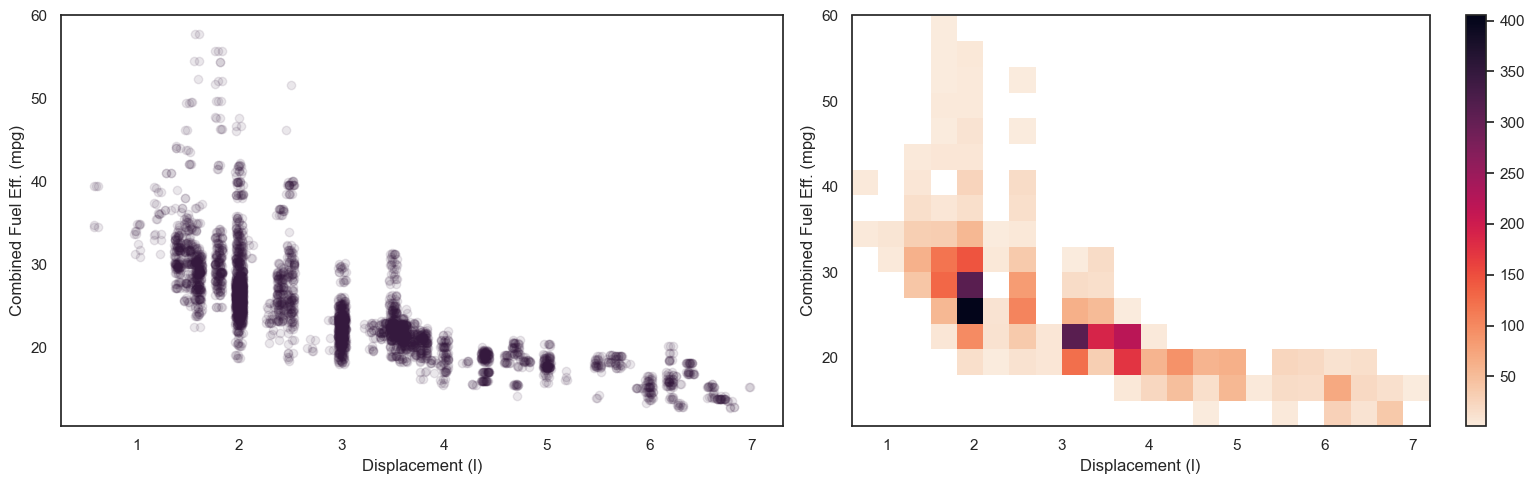

In [45]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.regplot(data=fuel_econ, x="displ", y="comb", fit_reg=False, x_jitter=0.04, scatter_kws={"alpha":1/10})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)'); 

plt.subplot(1,2,2)

# Specify bin edges in both axis
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
# cmap specifies the palette and using _r after palette name reverse its colors. 
# cmin = 0.5 starts coloring with 0.5 value. This means that the bins with 0 value are not colored
plt.hist2d(data=fuel_econ, x="displ", y="comb", cmap="rocket_r", cmin=0.5, bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)'); 
plt.tight_layout()

**Ans: Unlike scatter plot, using heatmap we can vary clearly analyze the data concentration**

## Violin Plot (Quant/Qual)

- Violin Plot draws the kernel density estimation of underlying distribution of quantitaive data across multiple categorical levels of a qualitative variable. 
- It also has the min box plot.
- Kernel Density Estimation is the estimation of probability density function of a random variable

**Q: How the fuel efficiency is affected by the vehicle class?**

### Changing dtype of qualitative variable from object (string) to Ordered category:

Using ordered categories will make the plot show categories in that order

In [46]:
fuel_econ["VClass"].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [47]:
from pandas.api.types import CategoricalDtype

In [48]:
ordered_categories = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
ordered_categories_dtype = CategoricalDtype(categories=ordered_categories, ordered=True)
fuel_econ["VClass"] = fuel_econ["VClass"].astype(ordered_categories_dtype)
fuel_econ["VClass"]

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

### PLOT

In [49]:
sns.set_theme(style="white", context="notebook", palette="mako_r")

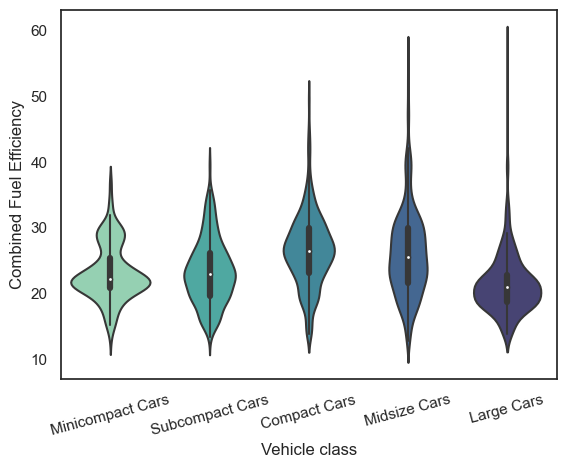

In [50]:
sns.violinplot(data=fuel_econ, x="VClass", y="comb")
plt.xticks(rotation = 15)
plt.xlabel("Vehicle class")
plt.ylabel("Combined Fuel Efficiency");

Inside violin plot is the small boxplot with white dot representing the median. Its length is interquartile range.

## Box Plot (Quant/Qual)

Box plot is the quick representation of discriptive statistics about numeric data on each categorical level

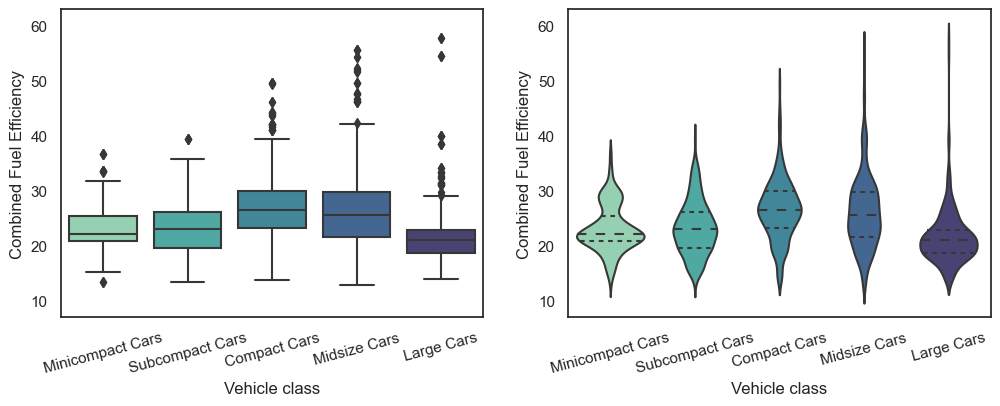

In [51]:
plt.figure(figsize=(12,4))

ax1 = plt.subplot(1,2,1)
sns.boxplot(data=fuel_econ, x="VClass", y="comb")
plt.xticks(rotation=15)
plt.xlabel("Vehicle class")
plt.ylabel("Combined Fuel Efficiency");

ax2 = plt.subplot(1,2,2, sharey=ax1)
# Use inner="quartile" to show inner-quartile instead of complete boxplot
sns.violinplot(data=fuel_econ, x="VClass", y="comb", inner="quartile")
plt.xticks(rotation=15)
plt.xlabel("Vehicle class")
plt.ylabel("Combined Fuel Efficiency");

**Box plot interpretation:**
- Box length is interquartile range IQR = (Q1 - Q3). 
- The top line is Q1 containing 25% data at its top
- The botton line is Q3 containing 25% data at its bottom
- The middle line is median containing 50% data at each of its sides
- The upper limit for wiskers is (1.5 * IQR). 
- Any value above the (Q1 + 1.5 * IQR) is considered outlier and wisker is drawn upto largest point inside the wisker upper bound. Same for bottom wisker.

***Using box plot we can quickly realize that:***
- The Compact, Midsize and Large cars have many outliers of very high efficiency
- The Midsize and Compact cars have highest efficiency while Large cars have lowest.
- The Midsize Cars have more spread in the values of efficiency than the Compact cars
- The efficiency of Minicompact cars is concentrated toward down of median

But unlike violin plot, we cannot see the distribution shape of data especially at whiskers

## Clustered Bar Chart (Qual/Qual)

Let plot a bar chart between two qualitative variables: Vehile Class 'VClass' and transmission type 'trans'

### Preparing Data

In [52]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### Convert the "VClass" column from a plain object type into an ordered categorical type

In [53]:
ordered_categories = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

ordered_categories_dtype = pd.api.types.CategoricalDtype(categories=ordered_categories, ordered=True)

fuel_econ["VClass"] = fuel_econ["VClass"].astype(ordered_categories_dtype)
fuel_econ["VClass"]

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

#### Add a new column for transmission type - Automatic or Manual

In [54]:
#'apply' method applies the function on each row. In case of Series, this row is individual object so we can directly apply
# split() method but in case of dataframe, this row is Series and we can apply the string function on each element of Series
# using .str at start
fuel_econ["trans_type"] = fuel_econ["trans"].apply(lambda x: x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


### PLOT

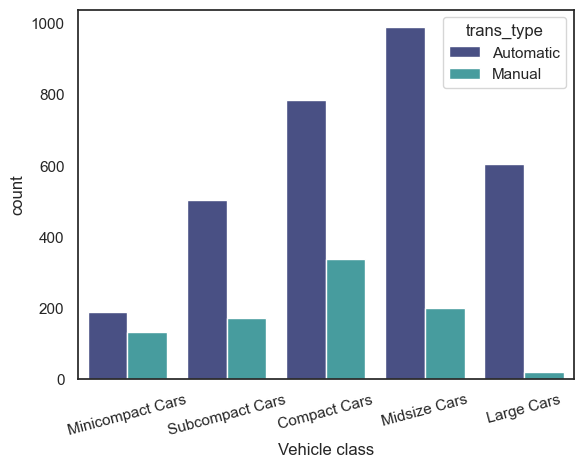

In [55]:
sns.countplot(data=fuel_econ, x="VClass", hue="trans_type", palette="mako")
plt.xlabel("Vehicle class")
plt.xticks(rotation=15);

*When level of first categorical variable 'VClass' is 'Compact Cars' and level of second categorical variable 'trans_type' is 'Automatic' then value of their occurances/counts or data point concentration is 800.*

## Alternative Approach (Heat Map) (Qual/Qual)

Lets plot heatmap instead while learning the data wrangling. 

We will use the heatmap() function from seaborn. It requires the 2D matrix of values as data argument. So first extract the required matrix from dataframe.

### Extract the matrix of values

We have five categorical levels in VClass variable and two categorical levels in trans_type variable. So its better to present the matrix as dataframe with VClass categoreis as indices and trans_type categories as column labels and their count or occurances as values in between.

In [56]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [57]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [58]:
# Use Series.reset_index() to convert a series into a dataframe object
# reset_index() will move the multi-index (VClass, trans_type) into columns hence dataframe is created with multiple columns.
# As column label for counts is unspecified is Series, so we need to provide the name as name argument in reset_index()
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [59]:
# Use DataFrame.pivot() to rearrange the data, to have transmission types as columns and vehicle classes as indices
ct_counts = ct_counts.pivot(index="VClass", columns="trans_type", values="count")
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


### PLOT

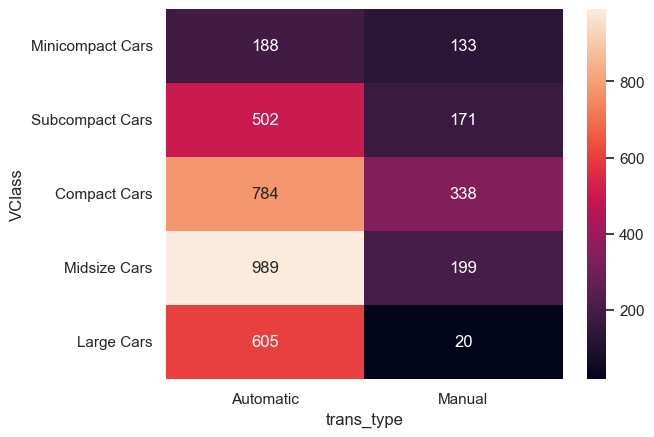

In [60]:
sns.heatmap(ct_counts, annot=True, fmt="d"); 

As you can see, although possible, it is very bad way to represent two qualitative variables using heatmap

Only use heatmap for (Qual/Qual) when there are so many levels of qualitative categorical variable.

## Faceting (Quant/ Qual_Many)

Faceting is preferred over violin and box plot when:
- There are so many levels of categorical variable
- There is need of more detailed analysis of quantitative variable over each level of categorical variable

Lets plot the Combined efficiency vs Vehicle class again using Faceting

In [61]:
sns.set_theme(style="darkgrid", context="notebook", palette="mako")

In [62]:
fuel_econ["comb"].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

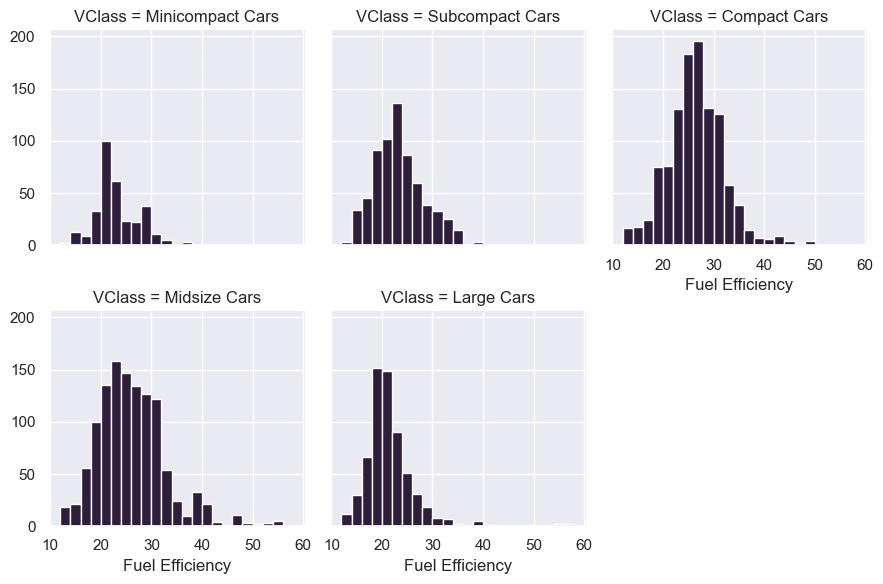

In [63]:
bin_edges = np.arange(12, 58+2, 2)

# First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). 
# Make sure that "VClass" column is ordered category type to get subplots in order without specifying order argument
g = sns.FacetGrid(data=fuel_econ.rename(columns={"comb":"Fuel Efficiency"}), col="VClass", sharey=True, col_wrap=3)

# Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").
g.map(plt.hist, "Fuel Efficiency", bins=bin_edges)


plt.xticks(np.arange(10, 61, 10));

*In above facet plot, we can now see that most of the cars are Compact and Midsize with very few Minicompact cars. We could not see this detail in violin or boxplot.*

**Comparison b/w violin, box and facet plot:**
- With box plot we could quickly see the distibution statistics, its spread and outliers 
- Violin plot improved over box plot by also being able to see the distribution shape
- Faceting imporved over violin plot by being able to see each distribution in detail. 

### Another Example

Let analyze the affect of transmission type in categorical variable "trans" on combined fuel efficiency "comb".

In [64]:
fuel_econ["trans"].describe()

count               3929
unique                27
top       Automatic (S8)
freq                 814
Name: trans, dtype: object

There are 27 categorical levels. We will plot each in descending order of average combined fuel efficiency

In [65]:
group_means = fuel_econ[["trans", "comb"]].groupby("trans").mean()

In [66]:
group_order = group_means.sort_values(by="comb", ascending=False).index

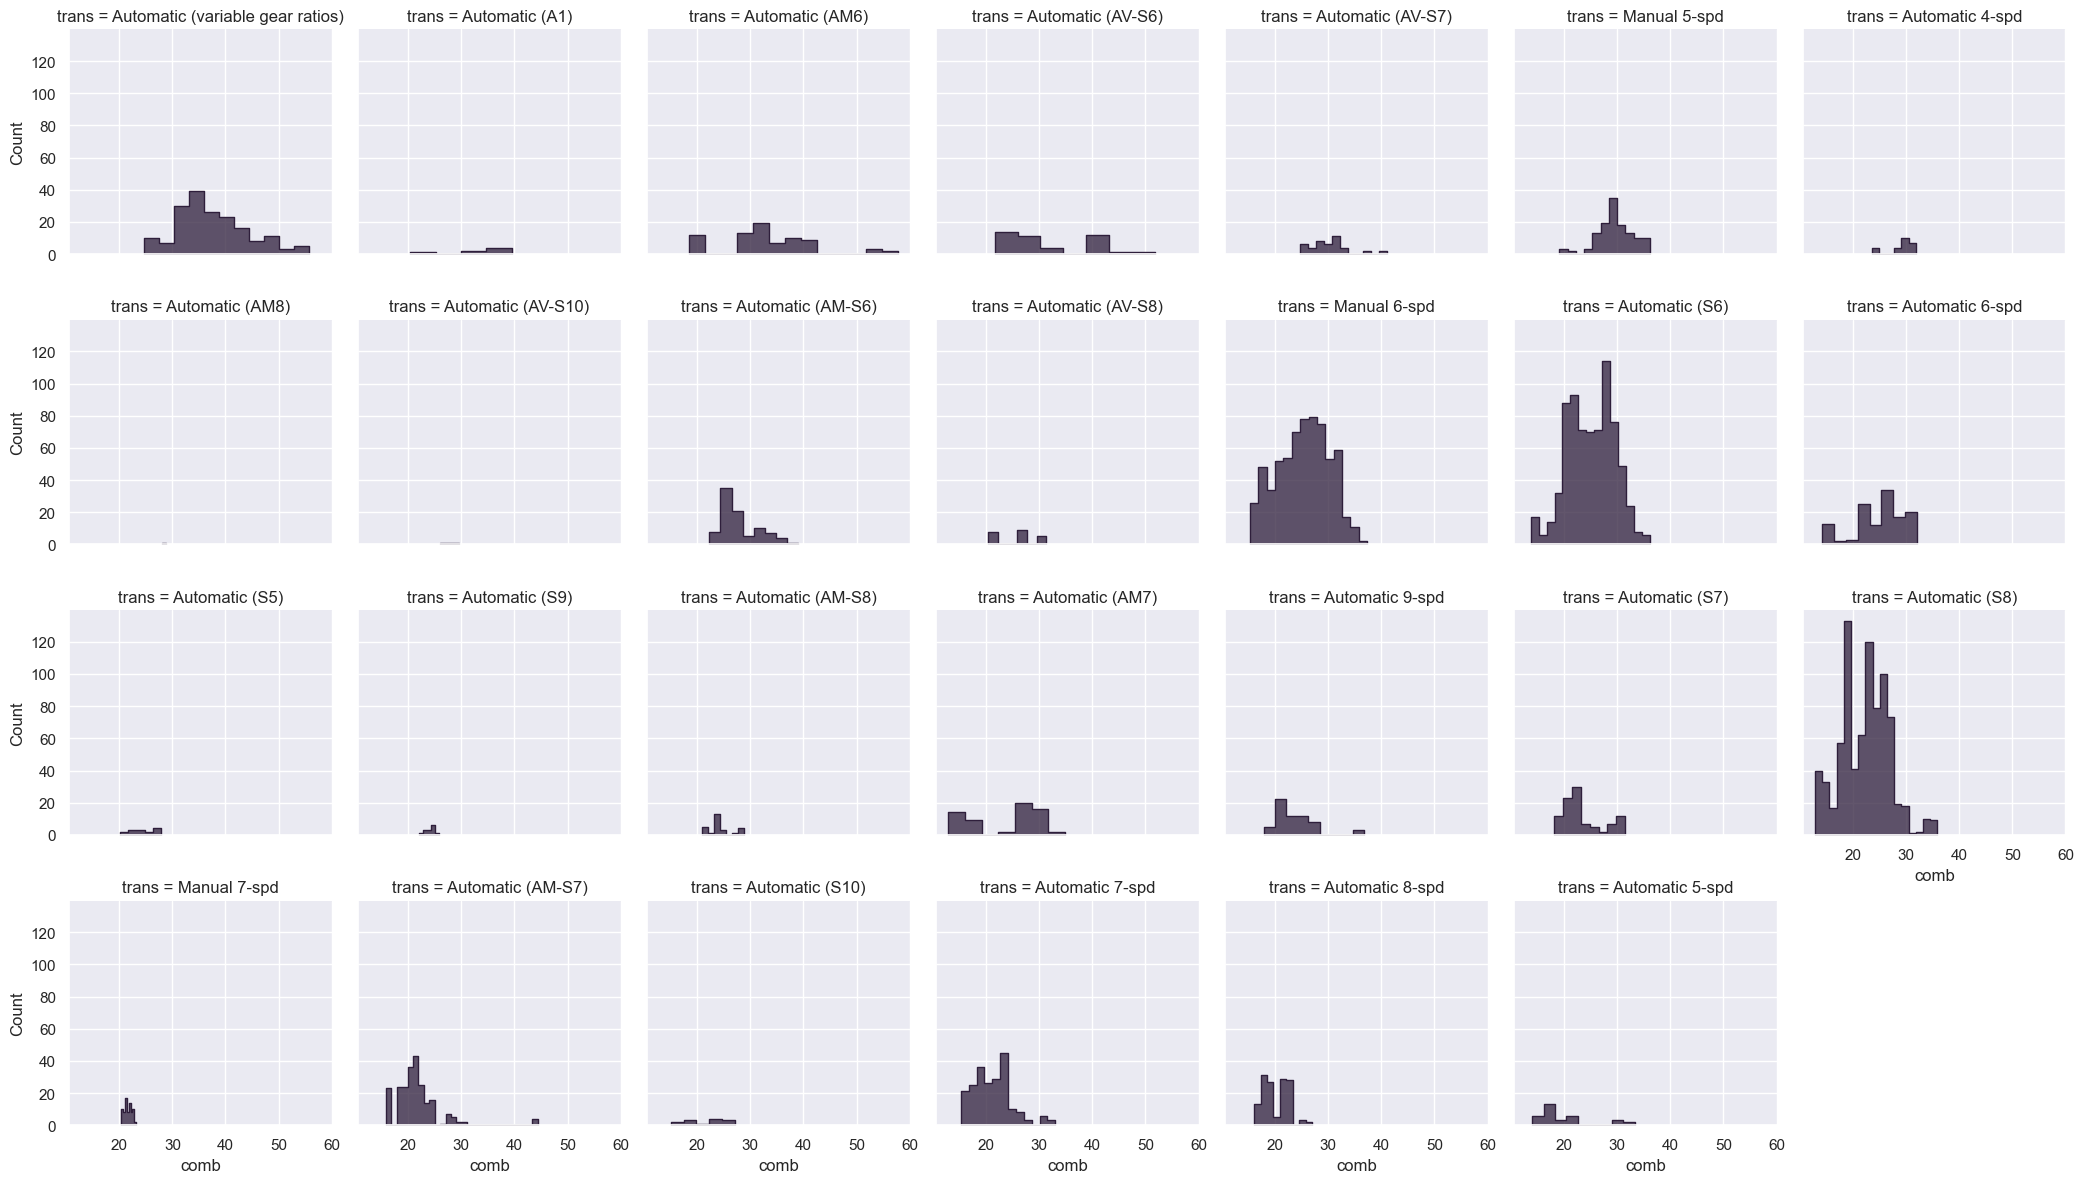

In [67]:
g = sns.FacetGrid(data=fuel_econ, col="trans", col_wrap=7, col_order=group_order)
g.map(sns.histplot, "comb", element="step");

Automatic (variable gear ratios) transmission type has highest combined fuel efficiency (upto 55) while the most common transmission types have combined fuel efficiency in the range of (15-35)

## Adapted Bar Chart (Quant/Qual)

The Bar Chart and Histograms can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

**Adapted Bar Chart vs Box and Violin plot:**
- Adapted Bar Chart is more direct and easier to read than box plot just like box plot is more direct than violin plot. 
- It covers only one statistic of Quantitative variable at a time while box plot covers set of statistics and violin plot covers distribution shape as well
- If the numeric variable is binary in nature e.g taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

In [68]:
color = sns.color_palette("mako")[3]

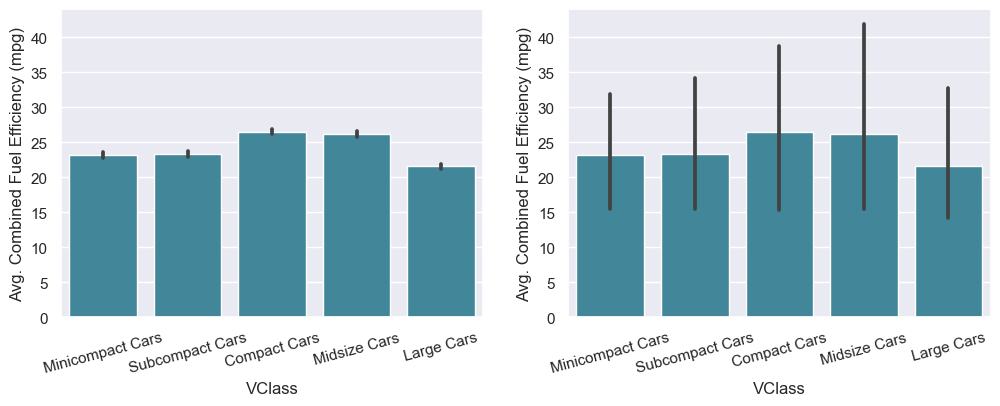

In [69]:
# bar plot is used. It shows only the mean (or other estimator) value at each level of the categorical variable
plt.figure(figsize=(12,4))

ax1 = plt.subplot(1,2,1)
# Using estimator of mean with error bars representing the 95% confidence interval of true mean (95% chance that true population mean lie in this range)
sns.barplot(data=fuel_econ, x="VClass", y="comb", estimator=np.mean, color=color, errorbar=("ci", 95))
plt.xticks(rotation=15)
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)");

ax2 = plt.subplot(1,2,2, sharey=ax1)
# Using estimator of mean with error bars representing the 95% prediction interval (95% chance that new values will lie in this range)
sns.barplot(data=fuel_econ, x="VClass", y="comb", estimator=np.mean, color=color, errorbar=("pi", 95))
plt.xticks(rotation=15)
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)");

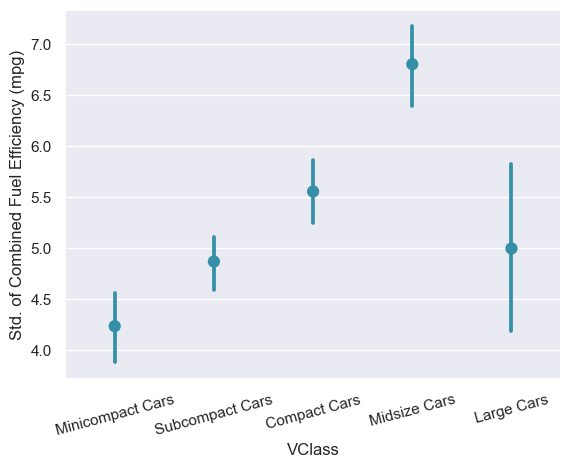

In [70]:
# Another version of bar plot is point plot which is same but without bars
# Using estimator of standard deviation with errorbars showing 95% confidence interval for true population std. 
sns.pointplot(data=fuel_econ, x='VClass', y='comb', estimator=np.std, color=color, errorbar=("ci", 95) , linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Std. of Combined Fuel Efficiency (mpg)');

**Comparison of (Quant/Qual) plots**

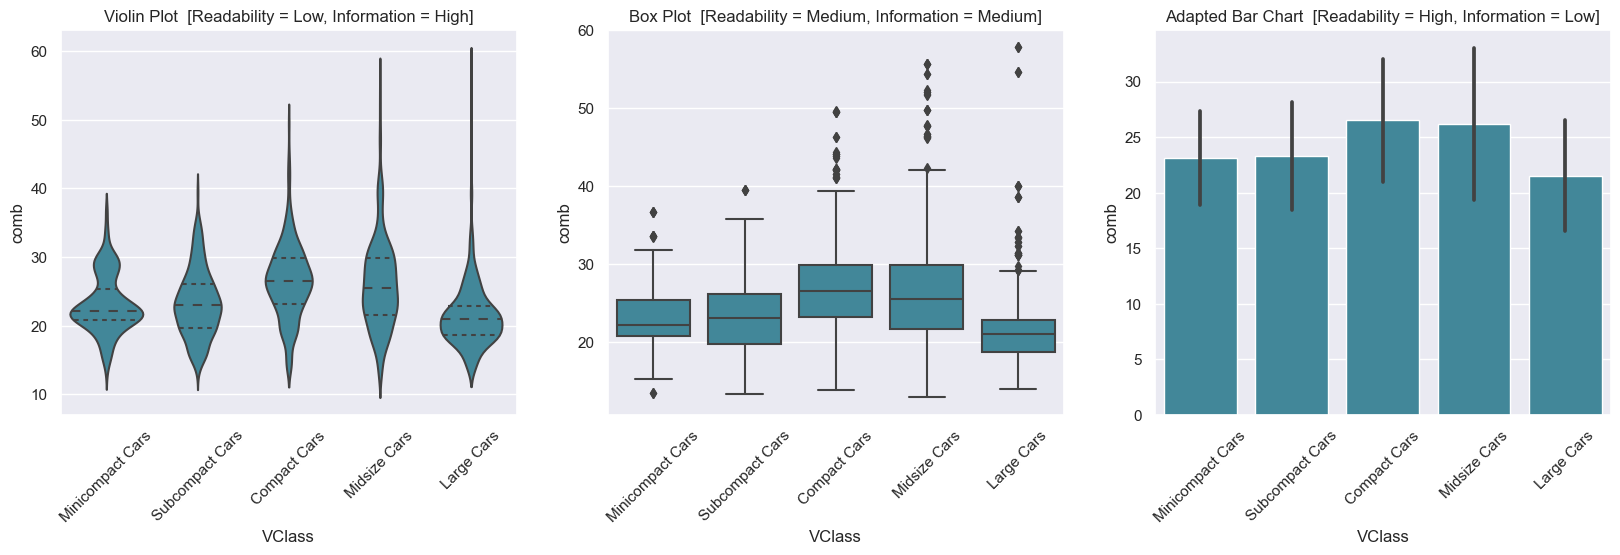

In [71]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner = "quartile", color = color)
plt.xticks(rotation = 45) # include label rotation due to small subplot size
plt.title("Violin Plot  [Readability = Low, Information = High]");

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color = color)
plt.xticks(rotation = 45)
plt.title("Box Plot  [Readability = Medium, Information = Medium]");

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color = color, errorbar="sd")
plt.xticks(rotation = 45)
plt.title("Adapted Bar Chart  [Readability = High, Information = Low]");


## Line Plot OR Adapted Histogram (Quant/Quant)

- It is alternative to scatter plot
- It is adapted histogram but with each bin representing statistic of another varaible rather than count
- In scatter plot, all data points are plotted but in line plot only one point is plotted for every unique x-value or bin of x-values

Lets plot the combined fuel efficiency against the displacement volume. But first we need to prepare the data otherwise we get all the data points connected with lines and plotted in order they are present in dataframe as shown below:

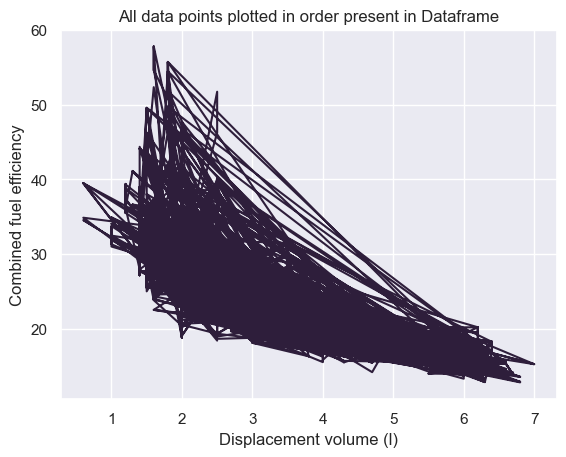

In [72]:
plt.errorbar(data=fuel_econ, x="displ", y="comb")
plt.xlabel("Displacement volume (l)")
plt.ylabel("Combined fuel efficiency")
plt.title("All data points plotted in order present in Dataframe");

### Data preparation

**We need to segment the data of x-axis into bins and then find the mean (or other statistic) of y-axis values that lie in each bin category.**

In [73]:
# Prepare the bin edges and bin centers
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1
print("bin edges:\n", bin_edges)
print("bin centers:\n", bin_centers)

bin edges:
 [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.
 4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7. ]
bin centers:
 [0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1
 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]


*Segment the data (displacement volume) into **ordered bin categories** using bin edges*

In [74]:
displ_binned = pd.cut(x=fuel_econ["displ"], bins=bin_edges, include_lowest=True) # include 0.6 in first bin
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [75]:
fuel_econ["comb"]

0       18.7389
1       25.2227
2       20.6716
3       19.8774
4       28.6813
         ...   
3924    54.4329
3925    41.0000
3926    42.0000
3927    23.0021
3928    21.3945
Name: comb, Length: 3929, dtype: float64

In [76]:
# As indices of `fuel_econ["comb"]` and 'displ_binned' are aligned so we can groupby without combining them into a dataframe
comb_mean = fuel_econ["comb"].groupby(displ_binned).mean()
comb_std = fuel_econ["comb"].groupby(displ_binned).std()
comb_mean.head() # As bins are ordered categories type so they are automatically ordered

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
Name: comb, dtype: float64

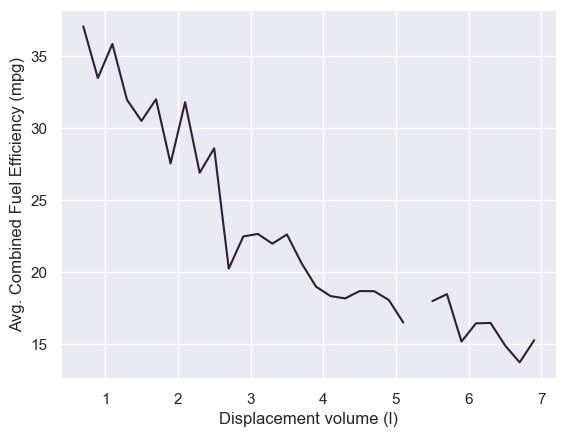

In [77]:
plt.errorbar(x=bin_centers, y=comb_mean)
# use yerr=comb_std to see standard deviation at each bin as error bar
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)")
plt.xlabel("Displacement volume (l)");

The good thing about univariate plots adapted to bivariate plot is that they are very easy to interpret. 

## Exercise:

### Q: Plot the distribution of combined fuel efficiencies for each manufacturer with at least 80 cars.

Finding manufacturers with at least 80 cars:

In [78]:
threshold = 80
make_frequency = fuel_econ["make"].value_counts() # Output already ordered
most_makers = make_frequency[make_frequency > threshold].index.values
most_makers # In descending order of cars

array(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI',
       'Audi', 'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia',
       'Cadillac', 'Toyota', 'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype=object)

Extract the data of these makers from 'fuel_econ' dataframe

In [79]:
fuel_econ_sub = fuel_econ.loc[fuel_econ["make"].isin(most_makers)]
fuel_econ_sub.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


Get the order of makers by average combined fuel efficiency:

In [80]:
make_means = fuel_econ_sub.groupby("make")["comb"].mean()
comb_order = make_means.sort_values(ascending=False).index.values
comb_order

array(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'], dtype=object)

Plot the FacetPlot:

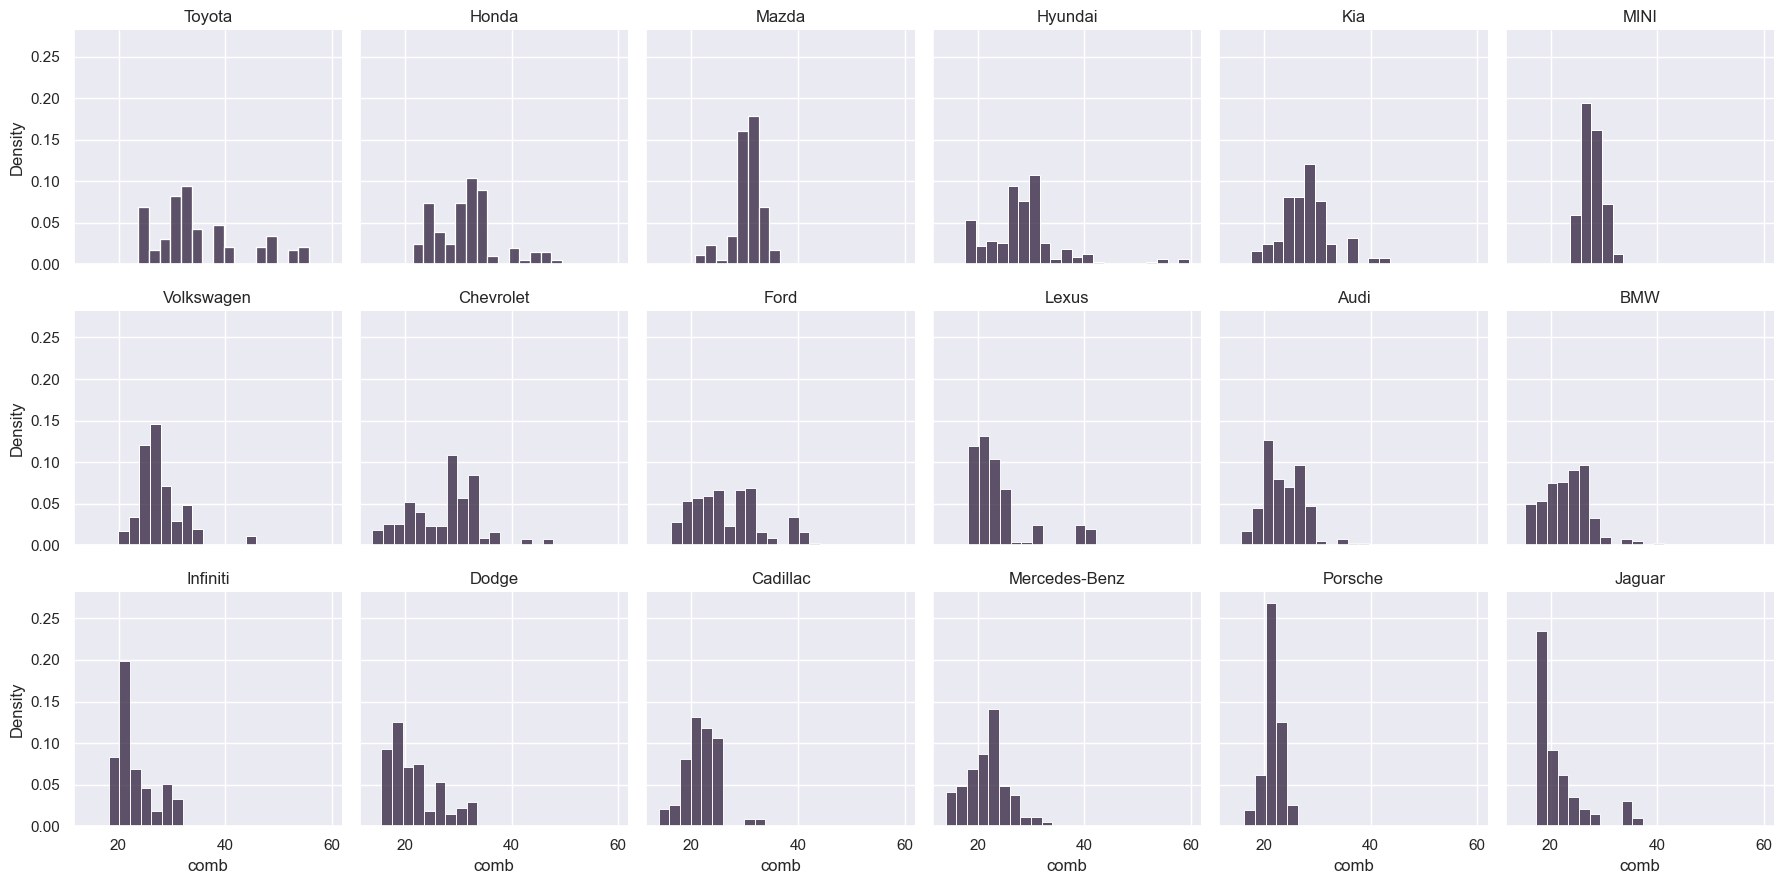

In [81]:
g = sns.FacetGrid(data=fuel_econ_sub, col="make", col_wrap=6, col_order=comb_order)
g.map(sns.histplot, "comb", binwidth=2, stat="density")
g.set_titles("{col_name}");

### Q: Plot the average combined fuel efficiency for each manufacturer with at least 80 cars

In [82]:
fuel_econ_sub.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


In [83]:
color = sns.color_palette("mako")[3]

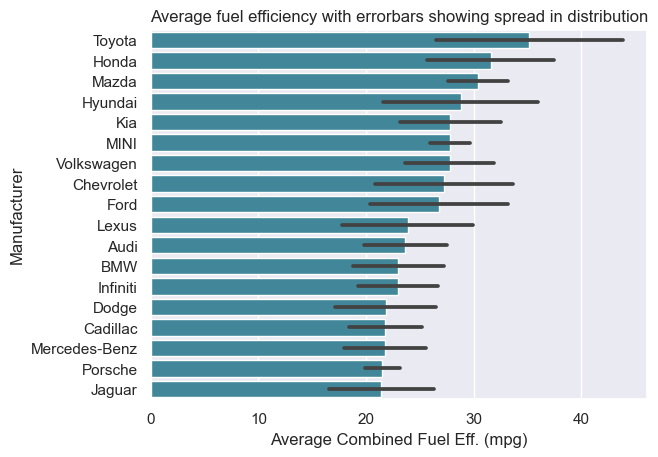

In [84]:
sns.barplot(data=fuel_econ_sub, y="make", x="comb", estimator=np.mean, 
            errorbar="sd", color = color, order=comb_order);
plt.title("Average fuel efficiency with errorbars showing spread in distribution")
plt.ylabel("Manufacturer")
plt.xlabel('Average Combined Fuel Eff. (mpg)');

## Extra: Swarm plot (Violin/Box plot alternative)

Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap

**Advantage over violin and box plot:**

It can show the frequency of each level of categorical variable in the same plot

**Disadvantage over violin and box plot:**

It is not appropiate for large amount of quantitative data

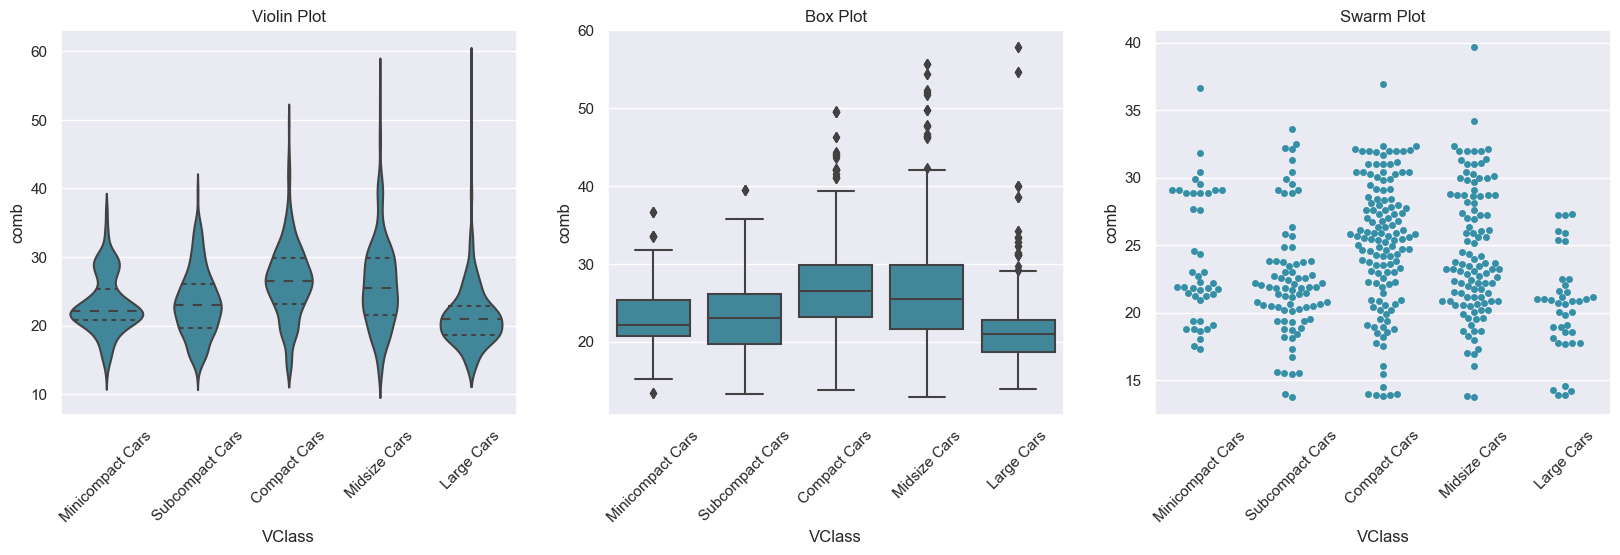

In [85]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner = "quartile", color = color)
plt.xticks(rotation = 45) # include label rotation due to small subplot size
plt.title("Violin Plot");

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color = color)
plt.xticks(rotation = 45)
plt.title("Box Plot");

# right plot: swarm plot
plt.subplot(1, 3, 3)
sns.swarmplot(data=fuel_econ[:400], x='VClass', y='comb', color = color)
plt.xticks(rotation = 45)
plt.title("Swarm Plot");

*Realize that we could only plot the first 400 observations in swarm plot.*

## Extra: JointGrid

Provide Grid for drawing a bivariate plot with marginal univariate plots.

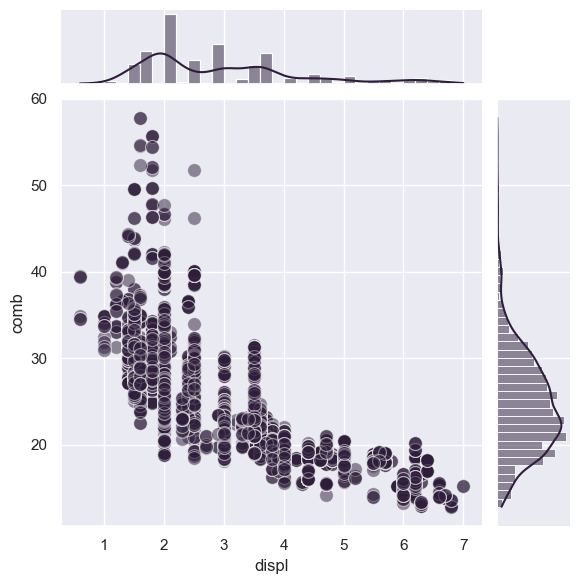

In [86]:
g = sns.JointGrid(data=fuel_econ, x="displ", y="comb")
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.histplot, kde=True);